# Problem Statement and Business case

In [3]:
# Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes.

# The 10 classes are as follows:
# 0 => T-shirt/top 
# 1 => Trouser 
# 2 => Pullover 
# 3 => Dress 
# 4 => Coat 
# 5 => Sandal 
# 6 => Shirt  
# 7 => Sneaker 
# 8 => Bag 
# 9 => Ankle boot

#Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. 
#Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, #
# with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.

# Loading initial dependencies

In [4]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import random

%matplotlib inline
sns.set_style("whitegrid")

# Loading Data

In [5]:
# dataframes creation for both training and testing datasets 
fashion_train_df = pd.read_csv('C:/Users/Vignesh/fashion_mnist/fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('C:/Users/Vignesh/fashion_mnist/fashion-mnist_test.csv', sep = ',')

In [6]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data exploration

In [8]:
fashion_train_df.shape


(60000, 785)

In [9]:
fashion_test_df.shape

(10000, 785)

In [10]:
# converting train and testing arrays

In [11]:
train = np.array(fashion_train_df, dtype = 'float32')
test = np.array(fashion_test_df, dtype = 'float32')

In [12]:
train.shape

(60000, 785)

In [13]:
train

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
test.shape

(10000, 785)

In [15]:
test

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

46351


Text(0.5, 1.0, 'Dress')

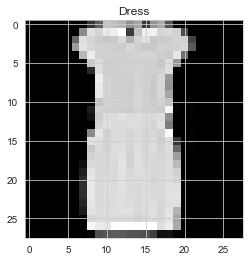

In [17]:
# check few images for better idea
i = random.randint(1,60000) # select any random index from 1 to 60,000
print(i)
plt.imshow(train[i,1:].reshape((28,28))) # reshape and plot the image


plt.imshow(train[i,1:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image
label_index = fashion_train_df["label"][i]
plt.title(class_names[label_index])

In [18]:
label = train[i,0]
label

3.0

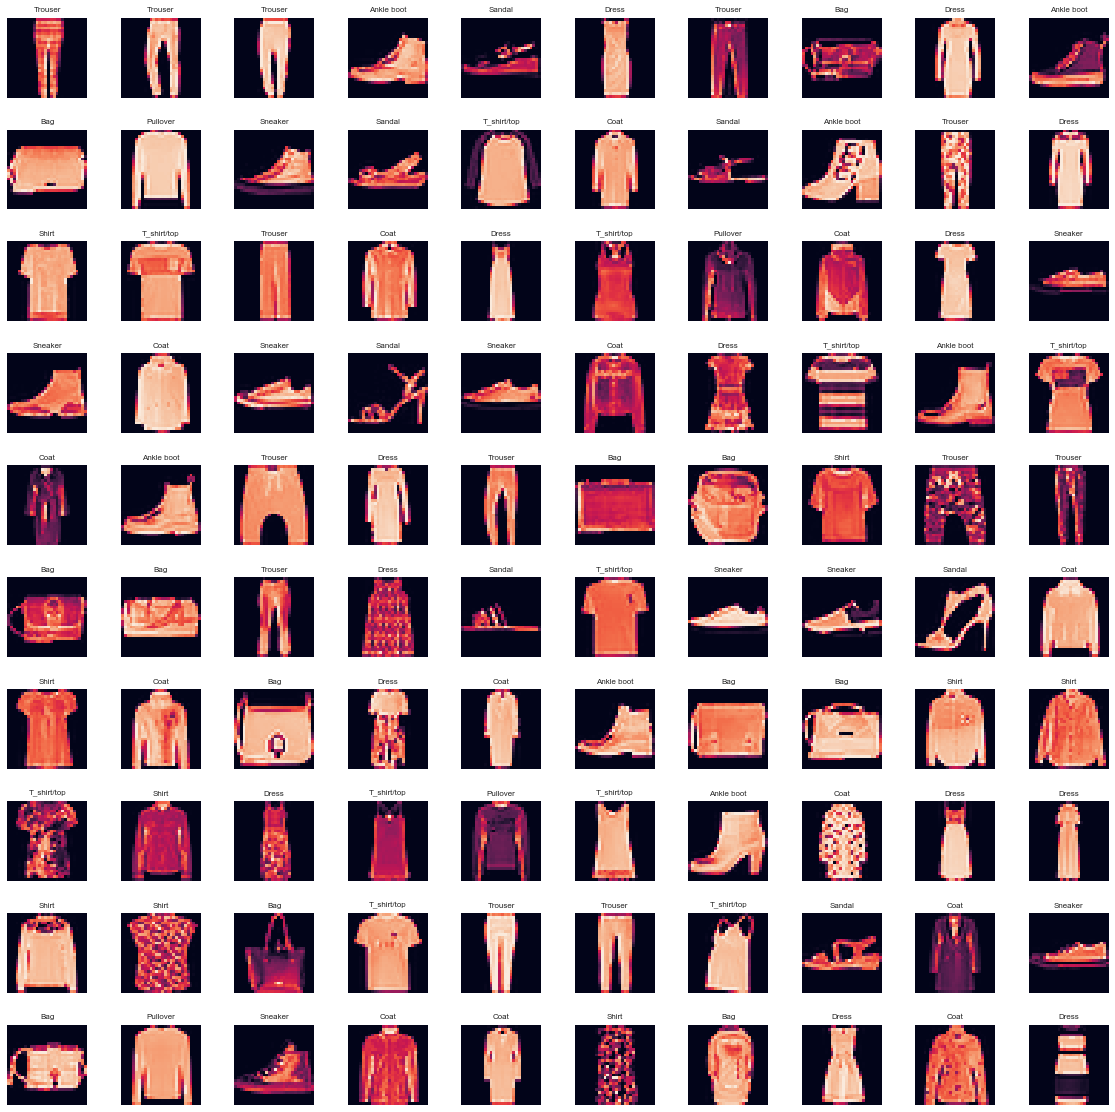

In [19]:
# Let's get a gird view of 10 by 10 and fit ramdomly selected 100 images
r_grid = 10
L_grid = 10


fig, axes = plt.subplots(L_grid, r_grid, figsize = (20, 20))

axes = axes.ravel()

n_train = len(train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, r_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train[index,1:].reshape((28,28)) )
    label_index = int(train[index,0])
    axes[i].set_title(class_names[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Preprocessing of the data

In [20]:
 
X_train = train[:, 1:] / 255
y_train = train[:, 0]

X_test = test[:, 1:] / 255
y_test = test[:,0]

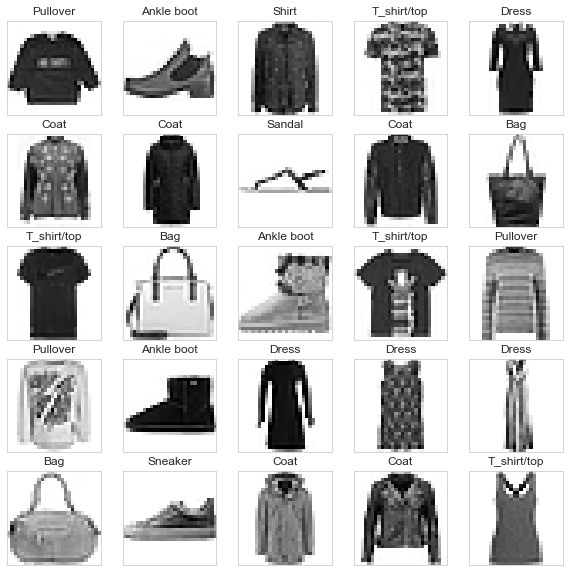

In [21]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

# Training the model

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [23]:
print(X_train.shape, X_validate.shape, y_train.shape, y_validate.shape)

(48000, 784) (12000, 784) (48000,) (12000,)


In [24]:
# * unpack the tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)



(48000, 28, 28, 1)
(48000,)
(12000, 28, 28, 1)


In [26]:
# Import dependcies for model

In [27]:
# TensorFlow and tf.keras
import keras

In [28]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [30]:
cnn_model = Sequential()

# Try 32 fliters first then 64
cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

# cnn_model.add(Conv2D(32,3, 3, activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [31]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

In [32]:
epochs = 150

history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = epochs,
                        verbose = 1, validation_data = (X_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/150
48000/48000 [==============================] - 7s 144us/step - loss: 1.1559 - accuracy: 0.5541 - val_loss: 0.6876 - val_accuracy: 0.7386
Epoch 2/150
48000/48000 [==============================] - 3s 72us/step - loss: 0.6891 - accuracy: 0.7390 - val_loss: 0.5659 - val_accuracy: 0.7891- loss: 0.7137 - accuracy: 0.73 - ETA: 1s -
Epoch 3/150
48000/48000 [==============================] - 3s 61us/step - loss: 0.6047 - accuracy: 0.7757 - val_loss: 0.5263 - val_accuracy: 0.8020
Epoch 4/150
48000/48000 [==============================] - 3s 52us/step - loss: 0.5540 - accuracy: 0.7954 - val_loss: 0.4789 - val_accuracy: 0.8237
Epoch 5/150
48000/48000 [==============================] - 3s 56us/step - loss: 0.5155 - accuracy: 0.8118 - val_loss: 0.4408 - val_accuracy: 0.8358
Epoch 6/150
48000/48000 [==============================] - 3s 55us/step - loss: 0.4863 - accuracy: 0.8226 - val_loss: 0.4148 - val_accuracy: 0.8482
Epoch 7/150
48000/

48000/48000 [==============================] - 3s 53us/step - loss: 0.2433 - accuracy: 0.9088 - val_loss: 0.2536 - val_accuracy: 0.9055
Epoch 56/150
48000/48000 [==============================] - 3s 55us/step - loss: 0.2443 - accuracy: 0.9088 - val_loss: 0.2502 - val_accuracy: 0.9085
Epoch 57/150
48000/48000 [==============================] - 3s 54us/step - loss: 0.2454 - accuracy: 0.9061 - val_loss: 0.2557 - val_accuracy: 0.9049
Epoch 58/150
48000/48000 [==============================] - 3s 59us/step - loss: 0.2431 - accuracy: 0.9085 - val_loss: 0.2552 - val_accuracy: 0.9048
Epoch 59/150
48000/48000 [==============================] - 3s 56us/step - loss: 0.2424 - accuracy: 0.9093 - val_loss: 0.2496 - val_accuracy: 0.9078
Epoch 60/150
48000/48000 [==============================] - 3s 54us/step - loss: 0.2436 - accuracy: 0.9084 - val_loss: 0.2495 - val_accuracy: 0.9098
Epoch 61/150
48000/48000 [==============================] - 3s 53us/step - loss: 0.2443 - accuracy: 0.9081 - val_loss: 

Epoch 110/150
48000/48000 [==============================] - 3s 61us/step - loss: 0.2007 - accuracy: 0.9240 - val_loss: 0.2434 - val_accuracy: 0.9124
Epoch 111/150
48000/48000 [==============================] - 3s 57us/step - loss: 0.2063 - accuracy: 0.9225 - val_loss: 0.2508 - val_accuracy: 0.9084
Epoch 112/150
48000/48000 [==============================] - 2s 50us/step - loss: 0.2026 - accuracy: 0.9237 - val_loss: 0.2477 - val_accuracy: 0.9113
Epoch 113/150
48000/48000 [==============================] - 2s 51us/step - loss: 0.2019 - accuracy: 0.9231 - val_loss: 0.2481 - val_accuracy: 0.9099
Epoch 114/150
48000/48000 [==============================] - 2s 49us/step - loss: 0.2034 - accuracy: 0.9240 - val_loss: 0.2498 - val_accuracy: 0.9103
Epoch 115/150
48000/48000 [==============================] - 2s 49us/step - loss: 0.2033 - accuracy: 0.9232 - val_loss: 0.2519 - val_accuracy: 0.9097
Epoch 116/150
48000/48000 [==============================] - 2s 50us/step - loss: 0.1981 - accuracy:

Text(0.5, 1.0, 'Accuracy evolution')

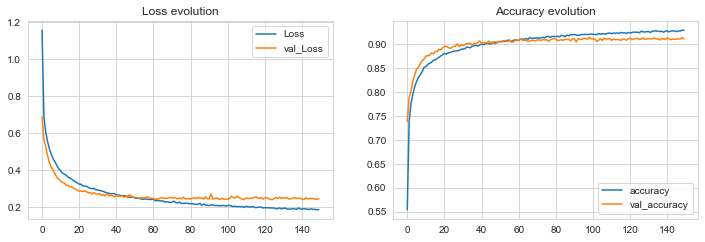

In [33]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [34]:
evaluation = cnn_model.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1]:.3f}')

10000/10000 [==============================] - 1s 108us/step
Test Accuracy : 0.914


In [35]:
# get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)

In [36]:
test_img = X_test[0]
prediction = cnn_model.predict(X_test)
prediction[0]

array([9.9823737e-01, 3.5844374e-12, 2.3190618e-04, 1.5793064e-07,
       2.1931102e-05, 8.5866576e-15, 1.5085990e-03, 3.0305490e-15,
       4.8494453e-09, 3.5265023e-13], dtype=float32)

In [37]:
np.argmax(prediction[0])

0

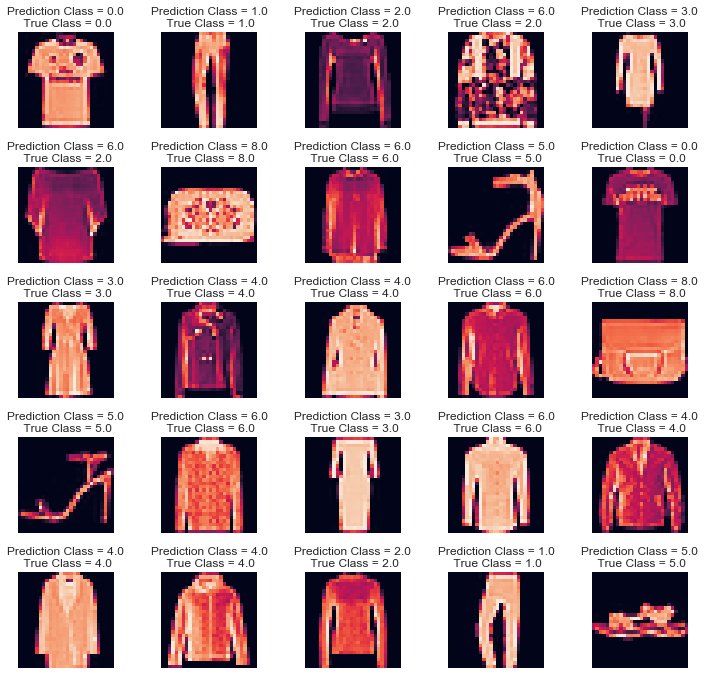

In [38]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n True Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

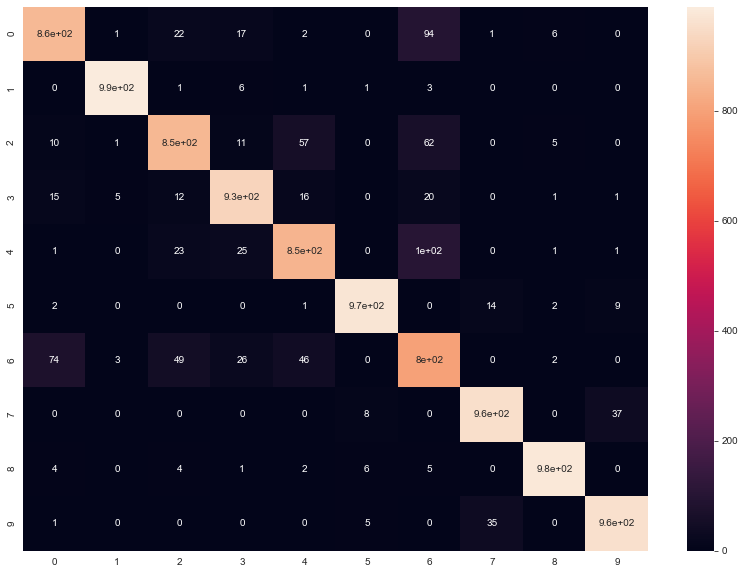

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

In [41]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = [f"Class {i}" for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.89      0.86      0.87      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.88      0.85      0.87      1000
     Class 3       0.92      0.93      0.92      1000
     Class 4       0.87      0.85      0.86      1000
     Class 5       0.98      0.97      0.98      1000
     Class 6       0.74      0.80      0.77      1000
     Class 7       0.95      0.95      0.95      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.95      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000

